In [2]:
import numpy as np
import matplotlib.pyplot as plt

from particle import Particle
from algorithms import BarnesHut, FMM, PairWise
from forces import Inverse
from universe import Universe

In [3]:
Ns = [10, 32, 100, 320, 1000, 3200, 10000]
N = 10
G = 1
DT = 0.01

force = Inverse(G)

In [3]:
PW_times_avg = []
PW_times_std = []

PW_algorithm = PairWise(force)

for N in Ns:
    particles = [Particle(charge=1.0) for _ in range(N)]
    result = %timeit -o PW_algorithm.calculate_accelerations(particles)
    PW_times_avg.append(result.average)
    PW_times_std.append(result.stdev)

65.7 µs ± 4.48 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
732 µs ± 62.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
6.91 ms ± 415 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
68.7 ms ± 2.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
685 ms ± 38.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.94 s ± 223 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1min 8s ± 2.38 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
THETA = 0.5

BH_times_avg = []
BH_times_std = []

BH_algorithm = BarnesHut(force, theta=THETA)

for N in Ns:
    particles = [Particle(charge=1.0) for _ in range(N)]
    result = %timeit -o BH_algorithm.calculate_accelerations(particles)
    BH_times_avg.append(result.average)
    BH_times_std.append(result.stdev)

937 µs ± 51.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.14 ms ± 277 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
20.6 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
95.5 ms ± 7.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
454 ms ± 73.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.65 s ± 106 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.31 s ± 341 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
EPSILON = 1e-3

PRECISION = int(-np.log2(EPSILON))

FMM_times_avg = []
FMM_times_std = []

for N in Ns:
    MAX_LEVEL = int(np.log(N) / np.log(4))
    FMM_algorithm = FMM(MAX_LEVEL, PRECISION, G)
    particles = [Particle(charge=1.0) for _ in range(N)]
    result = %timeit -o FMM_algorithm.calculate_accelerations(particles)
    FMM_times_avg.append(result.average)
    FMM_times_std.append(result.stdev)

738 µs ± 70.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
11.6 ms ± 183 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
84.7 ms ± 3.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
425 ms ± 6.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
481 ms ± 13.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.07 s ± 22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.95 s ± 318 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
PW_slope = np.polyfit(np.log(Ns), np.log(PW_times_avg), 1)[0]
BH_slope = np.polyfit(np.log(Ns), np.log(BH_times_avg), 1)[0]
FMM_slope = np.polyfit(np.log(Ns), np.log(FMM_times_avg), 1)[0]


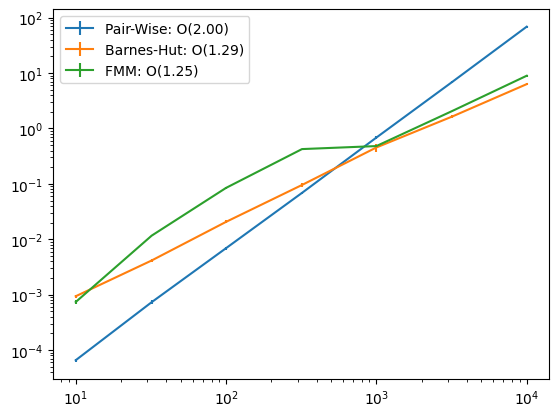

In [20]:
plt.errorbar(Ns, PW_times_avg, yerr=PW_times_std, label=f"Pair-Wise: O({PW_slope:.2f})")
plt.errorbar(Ns, BH_times_avg, yerr=BH_times_std, label=f"Barnes-Hut: O({BH_slope:.2f})")
plt.errorbar(Ns, FMM_times_avg, yerr=FMM_times_std, label=f"FMM: O({FMM_slope:.2f})")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()


In [4]:
EPSILON = 1e-3

PRECISION = int(-np.log2(EPSILON))

fine_FMM_times_avg = []
fine_FMM_times_std = []
fine_Ns = np.logspace(1, 4, 20, dtype=int)

for N in fine_Ns:
    MAX_LEVEL = int(np.log(N) / np.log(4))
    FMM_algorithm = FMM(MAX_LEVEL, PRECISION, G)
    particles = [Particle(charge=1.0) for _ in range(N)]
    result = %timeit -o FMM_algorithm.calculate_accelerations(particles)
    fine_FMM_times_avg.append(result.average)
    fine_FMM_times_std.append(result.stdev)

761 µs ± 47.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
945 µs ± 16.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
12.3 ms ± 82 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12.9 ms ± 118 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.6 ms ± 147 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
14.9 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
91.5 ms ± 1.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
94.1 ms ± 1.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
96.7 ms ± 1.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
474 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
475 ms ± 13.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
522 ms ± 38.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
559 ms ± 59.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.16 s ± 18.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.19 s ± 24.8 ms pe

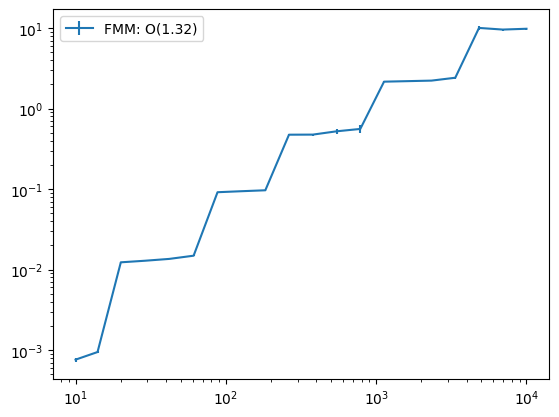

In [5]:
fine_FMM_slope = np.polyfit(np.log(fine_Ns), np.log(fine_FMM_times_avg), 1)[0]
plt.errorbar(fine_Ns, fine_FMM_times_avg, yerr=fine_FMM_times_std, label=f"FMM: O({fine_FMM_slope:.2f})")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()


[ 4096  4406  4739  5098  5484  5899  6345  6826  7342  7898  8496  9139
  9831 10575 11375 12236 13163 14159 15231 16384]


In [16]:
EPSILON = 1e-3

PRECISION = int(-np.log2(EPSILON))

MAX_LEVEL = 6
lvl_FMM_times_avg = []
lvl_FMM_times_std = []
lvl_Ns = np.logspace(MAX_LEVEL, MAX_LEVEL+1, 20, base=4, dtype=int)

for N in lvl_Ns:
    print(N)
    FMM_algorithm = FMM(MAX_LEVEL, PRECISION, G)
    particles = [Particle(charge=1.0) for _ in range(N)]
    result = %timeit -o FMM_algorithm.calculate_accelerations(particles)
    lvl_FMM_times_avg.append(result.average)
    lvl_FMM_times_std.append(result.stdev)

4096
8.51 s ± 374 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4406
8.43 s ± 139 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4739
8.46 s ± 97 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5098
8.5 s ± 72.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5484
8.48 s ± 94.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5899
8.73 s ± 170 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6345
8.59 s ± 155 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6826
9.18 s ± 992 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7342
8.54 s ± 84.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7898
8.7 s ± 121 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8496
8.73 s ± 113 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9139
8.83 s ± 189 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9831
8.68 s ± 109 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10575
8.88 s ± 317 ms per loop (mean ± std. dev. of 7 runs, 1 lo

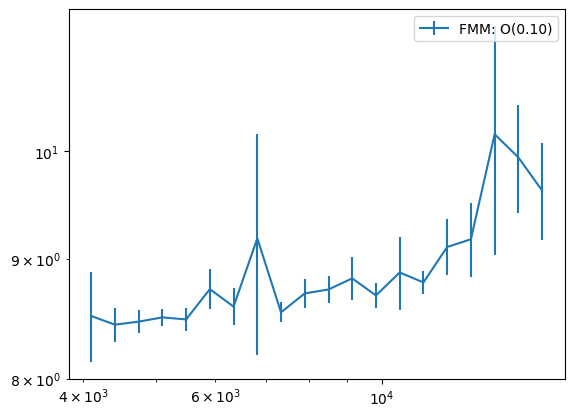

In [17]:
lvl_FMM_slope = np.polyfit(np.log(lvl_Ns), np.log(lvl_FMM_times_avg), 1)[0]
plt.errorbar(lvl_Ns, lvl_FMM_times_avg, yerr=lvl_FMM_times_std, label=f"FMM: O({lvl_FMM_slope:.2f})")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()
